In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
noaa_weather_raw = pd.read_csv("/content/drive/Shareddrives/Data Science 303 Group Project/csv/noaa_weather/noaa_CA_1992_2016_weather_2781174.csv")
print(noaa_weather_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    8761 non-null   object 
 1   NAME       8761 non-null   object 
 2   LATITUDE   8761 non-null   float64
 3   LONGITUDE  8761 non-null   float64
 4   ELEVATION  8761 non-null   float64
 5   DATE       8761 non-null   object 
 6   CDSD       7409 non-null   float64
 7   CLDD       8683 non-null   float64
 8   DP01       266 non-null    float64
 9   DP10       266 non-null    float64
 10  DSND       258 non-null    float64
 11  DSNW       247 non-null    float64
 12  DT00       8724 non-null   float64
 13  DT32       8724 non-null   float64
 14  DX32       8738 non-null   float64
 15  DX70       8738 non-null   float64
 16  DX90       8738 non-null   float64
 17  EMNT       8724 non-null   float64
 18  EMSD       258 non-null    float64
 19  EMSN       247 non-null    float64
 20  EMXP    

In [ ]:
NOAA_DECODE = {
    "CDSD": "NUM_COOLING_DEGREE_DAY_CUMULATIVE",
    "CLDD": "NUM_COOLING_DEGREE_DAY",
    "DP01": "NUM_DAYS_WITH_0_01_INCH_PRECIPITATION",
    "DP10": "NUM_DAYS_WITH_0_1_INCH_PRECIPITATION",
    "DSND": "NUM_DAYS_SNOW_DEPTH_1_INCH",
    "DSNW": "NUM_DAYS_SNOW_FALL_1_INCH",
    "DT00": "NUM_DAYS_WITH_MIN_TEMP_BELOW_0_FAHRENHEIT",
    "DT32": "NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT",
    "DX70": "NUM_DAYS_WITH_MAX_TEMP_ABOVE_70_FAHRENHEIT",
    "DX90": "NUM_DAYS_WITH_MAX_TEMP_ABOVE_90_FAHRENHEIT",
    "EMNT": "EXTREME_MINIMUM_TEMPERATURE_FOR_MONTH",
    "EMSD": "HIGHEST_DAILY_SNOW_DEPTH",
    "EMSN": "HIGHEST_DAILY_SNOW_FALL",
    "EMXP": "HIGHEST_DAILY_PRECIPITATION",
    "EMXT": "EXTREME_MAXIMUM_TEMPERATURE_MONTH",
    "HDSD": "HEATING_DEGREE_DAYS_TO_DATE",
    "HTDD": "NUM_DAYS_WHERE_AVG_TEMP_BELOW_65_FAHRENHEIT",
    "PRCP": "TOTAL_MONTHLY_RAINFALL",
    "SNOW": "TOTAL_MONTHLY_SNOWFALL",
    "TAVG": "TEMPERATURE_AVERAGE",
    "TMAX": "TEMPERATURE_MAX",
    "TMIN": "TEMPERATURE_MIN"
}


# DECODE AND ORGANIZE NOAA_DATA
noaa_weather = noaa_weather_raw[["STATION", "LATITUDE", "LONGITUDE", "ELEVATION"]]

# CONVERT NAME OF STATION TO UNDERSCORES
noaa_weather["STATION_NAME"] = noaa_weather_raw.NAME.map(lambda raw_name: raw_name[: (raw_name.index(" CALI"))].replace(" ", "_"))

# CONVERT DATE STRING TO DATE TIME YEAR AND MONTH
dates = pd.to_datetime(noaa_weather_raw["DATE"])
year = dates.dt.year
month = dates.dt.month

noaa_weather["YEAR"] = year
noaa_weather["MONTH"] = month


# CONVERT COLUMN NAMES TO ENGLISH
for (k, v) in NOAA_DECODE.items():
  length = len(noaa_weather_raw[k])
  num_missing = noaa_weather_raw[k].isnull().sum()
  print(f"Feature '{v}' is missing {(num_missing / length)*100:1.1f}%")

  # Exclude features that have > 90% of values missing
  if not (num_missing / length >= .9):
    noaa_weather[v] = noaa_weather_raw[k]

display(noaa_weather)
noaa_weather.info()

Feature 'NUM_COOLING_DEGREE_DAY_CUMULATIVE' is missing 15.4%
Feature 'NUM_COOLING_DEGREE_DAY' is missing 0.9%
Feature 'NUM_DAYS_WITH_0_01_INCH_PRECIPITATION' is missing 97.0%
Feature 'NUM_DAYS_WITH_0_1_INCH_PRECIPITATION' is missing 97.0%
Feature 'NUM_DAYS_SNOW_DEPTH_1_INCH' is missing 97.1%
Feature 'NUM_DAYS_SNOW_FALL_1_INCH' is missing 97.2%
Feature 'NUM_DAYS_WITH_MIN_TEMP_BELOW_0_FAHRENHEIT' is missing 0.4%
Feature 'NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT' is missing 0.4%
Feature 'NUM_DAYS_WITH_MAX_TEMP_ABOVE_70_FAHRENHEIT' is missing 0.3%
Feature 'NUM_DAYS_WITH_MAX_TEMP_ABOVE_90_FAHRENHEIT' is missing 0.3%
Feature 'EXTREME_MINIMUM_TEMPERATURE_FOR_MONTH' is missing 0.4%
Feature 'HIGHEST_DAILY_SNOW_DEPTH' is missing 97.1%
Feature 'HIGHEST_DAILY_SNOW_FALL' is missing 97.2%
Feature 'HIGHEST_DAILY_PRECIPITATION' is missing 97.0%
Feature 'EXTREME_MAXIMUM_TEMPERATURE_MONTH' is missing 0.3%
Feature 'HEATING_DEGREE_DAYS_TO_DATE' is missing 13.3%
Feature 'NUM_DAYS_WHERE_AVG_TEMP_BELOW_65_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,STATION,LATITUDE,LONGITUDE,ELEVATION,STATION_NAME,YEAR,MONTH,NUM_COOLING_DEGREE_DAY_CUMULATIVE,NUM_COOLING_DEGREE_DAY,NUM_DAYS_WITH_MIN_TEMP_BELOW_0_FAHRENHEIT,NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT,NUM_DAYS_WITH_MAX_TEMP_ABOVE_70_FAHRENHEIT,NUM_DAYS_WITH_MAX_TEMP_ABOVE_90_FAHRENHEIT,EXTREME_MINIMUM_TEMPERATURE_FOR_MONTH,EXTREME_MAXIMUM_TEMPERATURE_MONTH,HEATING_DEGREE_DAYS_TO_DATE,NUM_DAYS_WHERE_AVG_TEMP_BELOW_65_FAHRENHEIT,TEMPERATURE_AVERAGE,TEMPERATURE_MAX,TEMPERATURE_MIN
0,USR0000CCOH,39.8717,-121.7689,528.2,COHASSET,1992,1,0.0,0.0,0.0,2.0,0.0,0.0,27.0,68.0,NaN,563.0,46.8,53.7,40.0
1,USR0000CCOH,39.8717,-121.7689,528.2,COHASSET,1992,2,5.0,5.0,0.0,0.0,6.0,0.0,39.0,78.0,NaN,328.0,53.3,58.0,48.6
2,USR0000CCOH,39.8717,-121.7689,528.2,COHASSET,1992,3,5.0,0.0,0.0,0.0,4.0,0.0,41.0,80.0,NaN,331.0,53.9,61.1,46.8
3,USR0000CCOH,39.8717,-121.7689,528.2,COHASSET,1992,4,38.0,33.0,0.0,0.0,17.0,0.0,42.0,86.0,NaN,142.0,61.4,70.6,52.1
4,USR0000CCOH,39.8717,-121.7689,528.2,COHASSET,1992,5,307.0,269.0,0.0,0.0,31.0,10.0,50.0,97.0,NaN,5.0,73.5,85.3,61.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,USR0000CCRT,33.7403,-116.8414,594.4,CRANSTON,2015,9,1856.0,406.0,0.0,0.0,30.0,20.0,50.0,103.0,0.0,0.0,78.5,92.8,64.2
8757,USR0000CCRT,33.7403,-116.8414,594.4,CRANSTON,2015,10,2086.0,230.0,0.0,0.0,29.0,8.0,52.0,98.0,10.0,10.0,72.1,84.4,59.8
8758,USR0000CCRT,33.7403,-116.8414,594.4,CRANSTON,2015,11,2114.0,27.0,0.0,0.0,17.0,0.0,37.0,89.0,233.0,223.0,58.5,70.9,46.0
8759,USR0000CCRT,33.7403,-116.8414,594.4,CRANSTON,2015,12,2124.0,11.0,0.0,5.0,10.0,0.0,31.0,83.0,619.0,386.0,52.9,64.0,41.7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   STATION                                      8761 non-null   object 
 1   LATITUDE                                     8761 non-null   float64
 2   LONGITUDE                                    8761 non-null   float64
 3   ELEVATION                                    8761 non-null   float64
 4   STATION_NAME                                 8761 non-null   object 
 5   YEAR                                         8761 non-null   int64  
 6   MONTH                                        8761 non-null   int64  
 7   NUM_COOLING_DEGREE_DAY_CUMULATIVE            7409 non-null   float64
 8   NUM_COOLING_DEGREE_DAY                       8683 non-null   float64
 9   NUM_DAYS_WITH_MIN_TEMP_BELOW_0_FAHRENHEIT    8724 non-null   float64
 10  

Impute Values

In [ ]:
# First, we want to drop stations that don't have enough data over the given time period
max_year = 2016
min_year = noaa_weather['YEAR'].min()
station_name_list = list(noaa_weather["STATION_NAME"].unique())
total_station_month_year_pairs_expected = (max_year - min_year + 1) * 12

# Print out the percentage of missing station, month, year pairs:
station_drop_list = []
for station in station_name_list:
  num_present = (noaa_weather["STATION_NAME"] == station).sum()
  # print(f"station: {station}, { num_present / total_station_month_year_pairs_expected}")
  if num_present / total_station_month_year_pairs_expected < .75:
    station_drop_list.append(station)

# For any station with less than 75 percent of month-date pairs missing, drop them
for station in station_drop_list:
  print(station)
  noaa_weather.drop(noaa_weather[noaa_weather['STATION_NAME'] == station].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


MALLORY_RIDGE
BRADLEY
CASHMAN
BIG_ROCK
MAD_RIVER
EEL_RIVER_CAMP
JOHNSONDALE
MODOC_NWR
AMMO_DUMP
TEMESCAL_LPF
LYTLE_CREEK
MAPLE_CREEK
FAWNSKIN
CLEAR_CREEK
BEVERLY_HILLS
MILO
KERNVILLE
TRIMMER
CARPENTER_RIDGE
OJAI
CRANSTON


In [ ]:
def count_missing_data(df):
  # Count the number of missing values by feature:
  df_na = df.isna().sum()
  df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)
  df_na = (df_na / len(df)) * 100
  missing_data = pd.DataFrame({"Missing Ratio" : df_na})
  display(missing_data)

count_missing_data(noaa_weather)

,Missing Ratio
NUM_COOLING_DEGREE_DAY_CUMULATIVE,15.925234
HEATING_DEGREE_DAYS_TO_DATE,14.074766
NUM_DAYS_WHERE_AVG_TEMP_BELOW_65_FAHRENHEIT,0.934579
NUM_COOLING_DEGREE_DAY,0.934579
TEMPERATURE_AVERAGE,0.598131
TEMPERATURE_MAX,0.392523
EXTREME_MAXIMUM_TEMPERATURE_MONTH,0.392523
NUM_DAYS_WITH_MAX_TEMP_ABOVE_90_FAHRENHEIT,0.392523
NUM_DAYS_WITH_MAX_TEMP_ABOVE_70_FAHRENHEIT,0.392523
TEMPERATURE_MIN,0.280374


In [ ]:
# We will next impute values. We want to impute only from other samples from the same weather station. We will group by station AND month.
# We can expect that year to year, a value should be about the same for each month
stations = noaa_weather.STATION_NAME.unique()
features_by_station_and_month = noaa_weather.groupby([noaa_weather.STATION_NAME, noaa_weather.MONTH])
for feature in noaa_weather.select_dtypes(include="number").columns:
  # Skip imputing the year, month, latitude, or longitude:
  if not feature == "YEAR" and not feature == "MONTH" and not feature == "LATITUDE" and not feature == "LONGITUDE":
    print(f"Imputing feature by station and month { feature }")
    noaa_weather[feature] = features_by_station_and_month[feature].transform(lambda group: group.fillna(group.mean()))

count_missing_data(noaa_weather)

Imputing feature by station and month ELEVATION
Imputing feature by station and month NUM_COOLING_DEGREE_DAY_CUMULATIVE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Imputing feature by station and month NUM_COOLING_DEGREE_DAY
Imputing feature by station and month NUM_DAYS_WITH_MIN_TEMP_BELOW_0_FAHRENHEIT
Imputing feature by station and month NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT
Imputing feature by station and month NUM_DAYS_WITH_MAX_TEMP_ABOVE_70_FAHRENHEIT
Imputing feature by station and month NUM_DAYS_WITH_MAX_TEMP_ABOVE_90_FAHRENHEIT
Imputing feature by station and month EXTREME_MINIMUM_TEMPERATURE_FOR_MONTH
Imputing feature by station and month EXTREME_MAXIMUM_TEMPERATURE_MONTH
Imputing feature by station and month HEATING_DEGREE_DAYS_TO_DATE
Imputing feature by station and month NUM_DAYS_WHERE_AVG_TEMP_BELOW_65_FAHRENHEIT
Imputing feature by station and month TEMPERATURE_AVERAGE
Imputing feature by station and month TEMPERATURE_MAX
Imputing feature by station and month TEMPERATURE_MIN


,Missing Ratio


In [ ]:
# Check to make sure all columns have correct type.... Looks good
noaa_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 8448
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   STATION                                      5350 non-null   object 
 1   LATITUDE                                     5350 non-null   float64
 2   LONGITUDE                                    5350 non-null   float64
 3   ELEVATION                                    5350 non-null   float64
 4   STATION_NAME                                 5350 non-null   object 
 5   YEAR                                         5350 non-null   int64  
 6   MONTH                                        5350 non-null   int64  
 7   NUM_COOLING_DEGREE_DAY_CUMULATIVE            5350 non-null   float64
 8   NUM_COOLING_DEGREE_DAY                       5350 non-null   float64
 9   NUM_DAYS_WITH_MIN_TEMP_BELOW_0_FAHRENHEIT    5350 non-null   float64
 10  

In [ ]:
# TODO: CHECK IF THIS GIVES GOOD RESULTS. HAVING TO IMPUTE A LOT!!


# Check which station, month, year pairs are missing
import itertools

noaa_stations = list(noaa_weather["STATION_NAME"].unique())
years = [i for i in range(1992, 2016)]
months = [i for i in range(1, 13)]

station_month_year_pairs = list(itertools.product(noaa_stations, months, years))
# print(station_month_year_pairs)
pairs_missing = 0
pairs_not_missing = 0

all_missing_triplets = []
for triple in station_month_year_pairs:
  if not ((noaa_weather["STATION_NAME"] == triple[0]) & (noaa_weather["YEAR"] == triple[2]) & (noaa_weather["MONTH"] == triple[1])).any():
    # print(f"Missing: {triple[0]}:{triple[1]}:{triple[2]}")
    all_missing_triplets.append((triple))
    pairs_missing += 1
  else:
    pairs_not_missing += 1

print(f"Total Station_Month_Year triplets missing: {pairs_missing}, or {pairs_missing / (pairs_missing + pairs_not_missing) * 100}%")

Total Station_Month_Year triplets missing: 429, or 7.447916666666667%


In [ ]:
# With the given list of missing station, month, year pairs, impute the values.
print("Will now impute the prior values")
def impute_missing_month_row_year_pairs(true_records, imputed_records, station, month, year):
  """
  Given an incomplete dataset, and a missing (station, year, month) triplet,
  impute a row using the available data.

  Hierarchy to generate / impute a value:
  1. Reuse last recorded station month year pair. For example, if ("A", 2000, 7) is missing, fill it in with ("A", 1999, 7)
  2. If no years prior to the missing year exist, use the least recent recording from the same station
  """
  matching = true_records[((true_records["STATION_NAME"] == station) & (true_records["MONTH"] == month))]
  months_prior_to_year = matching[matching["YEAR"] < year]
  
  if months_prior_to_year.shape[0]:
    idx = months_prior_to_year["YEAR"].argmax()
    best_match = months_prior_to_year.iloc[idx].copy()
    print(f"PAST MATCH: { station }, { month }, { year } -> {best_match.STATION_NAME}, {best_match.MONTH}, {best_match.YEAR}" )
  else:
    # Get the least recent year if no prior years exist
    months_after_year = matching[matching["YEAR"] > year]
    idx = months_after_year["YEAR"].argmin()
    best_match = months_after_year.iloc[idx].copy()
    print(f"FUTURE MATCH: { station }, { month }, { year } -> {best_match.STATION_NAME}, {best_match.MONTH}, {best_match.YEAR}" )
  
  best_match["YEAR"] = year
  best_match["MONTH"] = month

  imputed_records.append(best_match)

imputed_records = []
for missing_record in all_missing_triplets:
  impute_missing_month_row_year_pairs(noaa_weather, imputed_records, missing_record[0], missing_record[1], missing_record[2])

noaa_weather = noaa_weather.append(imputed_records)
# get_matching_station(noaa_weather, "HUNTER_MOUNTAIN", 12, 2012)

Will now impute the prior values
PAST MATCH: COHASSET, 1, 1995 -> COHASSET, 1, 1994
PAST MATCH: COHASSET, 2, 1995 -> COHASSET, 2, 1994
PAST MATCH: COHASSET, 5, 2012 -> COHASSET, 5, 2011
PAST MATCH: COHASSET, 6, 2012 -> COHASSET, 6, 2011
PAST MATCH: COHASSET, 12, 1994 -> COHASSET, 12, 1993
PAST MATCH: LADDER_BUTTE, 1, 1993 -> LADDER_BUTTE, 1, 1992
PAST MATCH: LADDER_BUTTE, 1, 1995 -> LADDER_BUTTE, 1, 1994
PAST MATCH: LADDER_BUTTE, 1, 2000 -> LADDER_BUTTE, 1, 1999
PAST MATCH: LADDER_BUTTE, 2, 1993 -> LADDER_BUTTE, 2, 1992
PAST MATCH: LADDER_BUTTE, 2, 1995 -> LADDER_BUTTE, 2, 1994
PAST MATCH: LADDER_BUTTE, 3, 1993 -> LADDER_BUTTE, 3, 1992
PAST MATCH: LADDER_BUTTE, 3, 1995 -> LADDER_BUTTE, 3, 1994
PAST MATCH: LADDER_BUTTE, 4, 1993 -> LADDER_BUTTE, 4, 1992
PAST MATCH: LADDER_BUTTE, 4, 1995 -> LADDER_BUTTE, 4, 1994
PAST MATCH: LADDER_BUTTE, 11, 1995 -> LADDER_BUTTE, 11, 1994
PAST MATCH: LADDER_BUTTE, 11, 2000 -> LADDER_BUTTE, 11, 1999
FUTURE MATCH: LADDER_BUTTE, 12, 1992 -> LADDER_BUTTE, 12,

## Plotting each of the numerical features

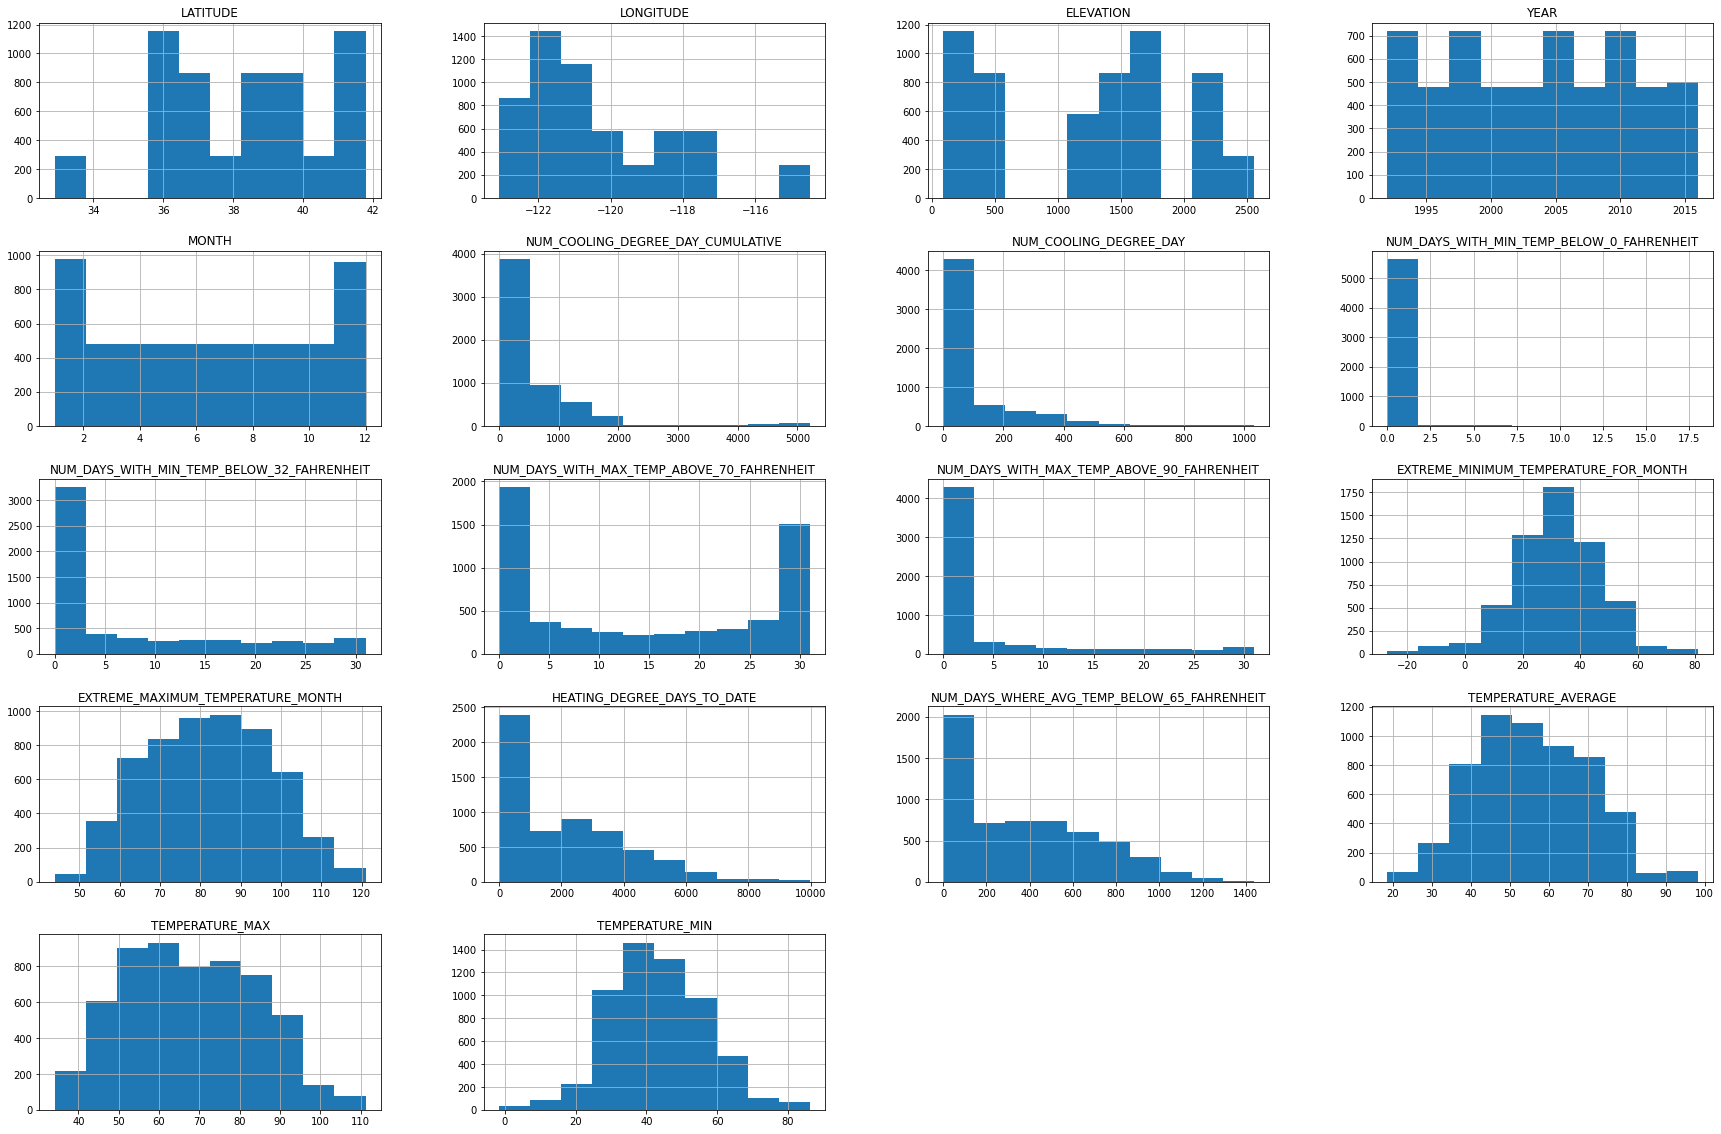

In [ ]:
def plot_numerical_features(df):
  df.select_dtypes(include = "number").hist(figsize=(30, 20))

plot_numerical_features(noaa_weather)

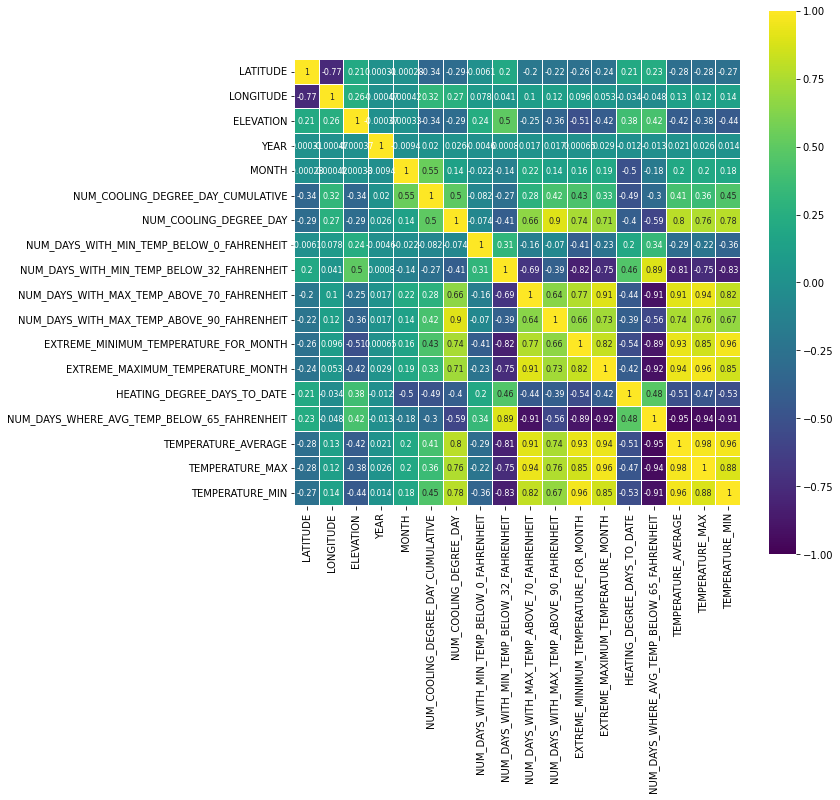

In [ ]:
# Correlation Analysis
noaa_corr = noaa_weather.select_dtypes(include = "number").corr()

plt.figure(figsize=(10, 10))
sns.heatmap(noaa_corr,
cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
annot=True, annot_kws={"size": 8}, square=True);

## Correct Skew of Data

In [ ]:
from scipy.stats import skew

numeric_feats = noaa_weather.dtypes[noaa_weather.dtypes != "object"]
numeric_feats = numeric_feats.drop(["LATITUDE", "LONGITUDE", "YEAR", "MONTH"])
numeric_feats = numeric_feats.index

# Check skew in numerical features:
skewed_feats = noaa_weather[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
print(skewed_feats)

NUM_DAYS_WITH_MIN_TEMP_BELOW_0_FAHRENHEIT      9.213557
NUM_COOLING_DEGREE_DAY_CUMULATIVE              3.124595
NUM_COOLING_DEGREE_DAY                         2.682703
NUM_DAYS_WITH_MAX_TEMP_ABOVE_90_FAHRENHEIT     2.044313
NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT     1.081981
HEATING_DEGREE_DAYS_TO_DATE                    0.934166
NUM_DAYS_WHERE_AVG_TEMP_BELOW_65_FAHRENHEIT    0.568674
TEMPERATURE_AVERAGE                            0.180799
TEMPERATURE_MAX                                0.168518
NUM_DAYS_WITH_MAX_TEMP_ABOVE_70_FAHRENHEIT     0.122478
TEMPERATURE_MIN                                0.107454
EXTREME_MAXIMUM_TEMPERATURE_MONTH              0.019898
ELEVATION                                     -0.081768
EXTREME_MINIMUM_TEMPERATURE_FOR_MONTH         -0.214279
dtype: float64


Corrected skew in the numerical features!


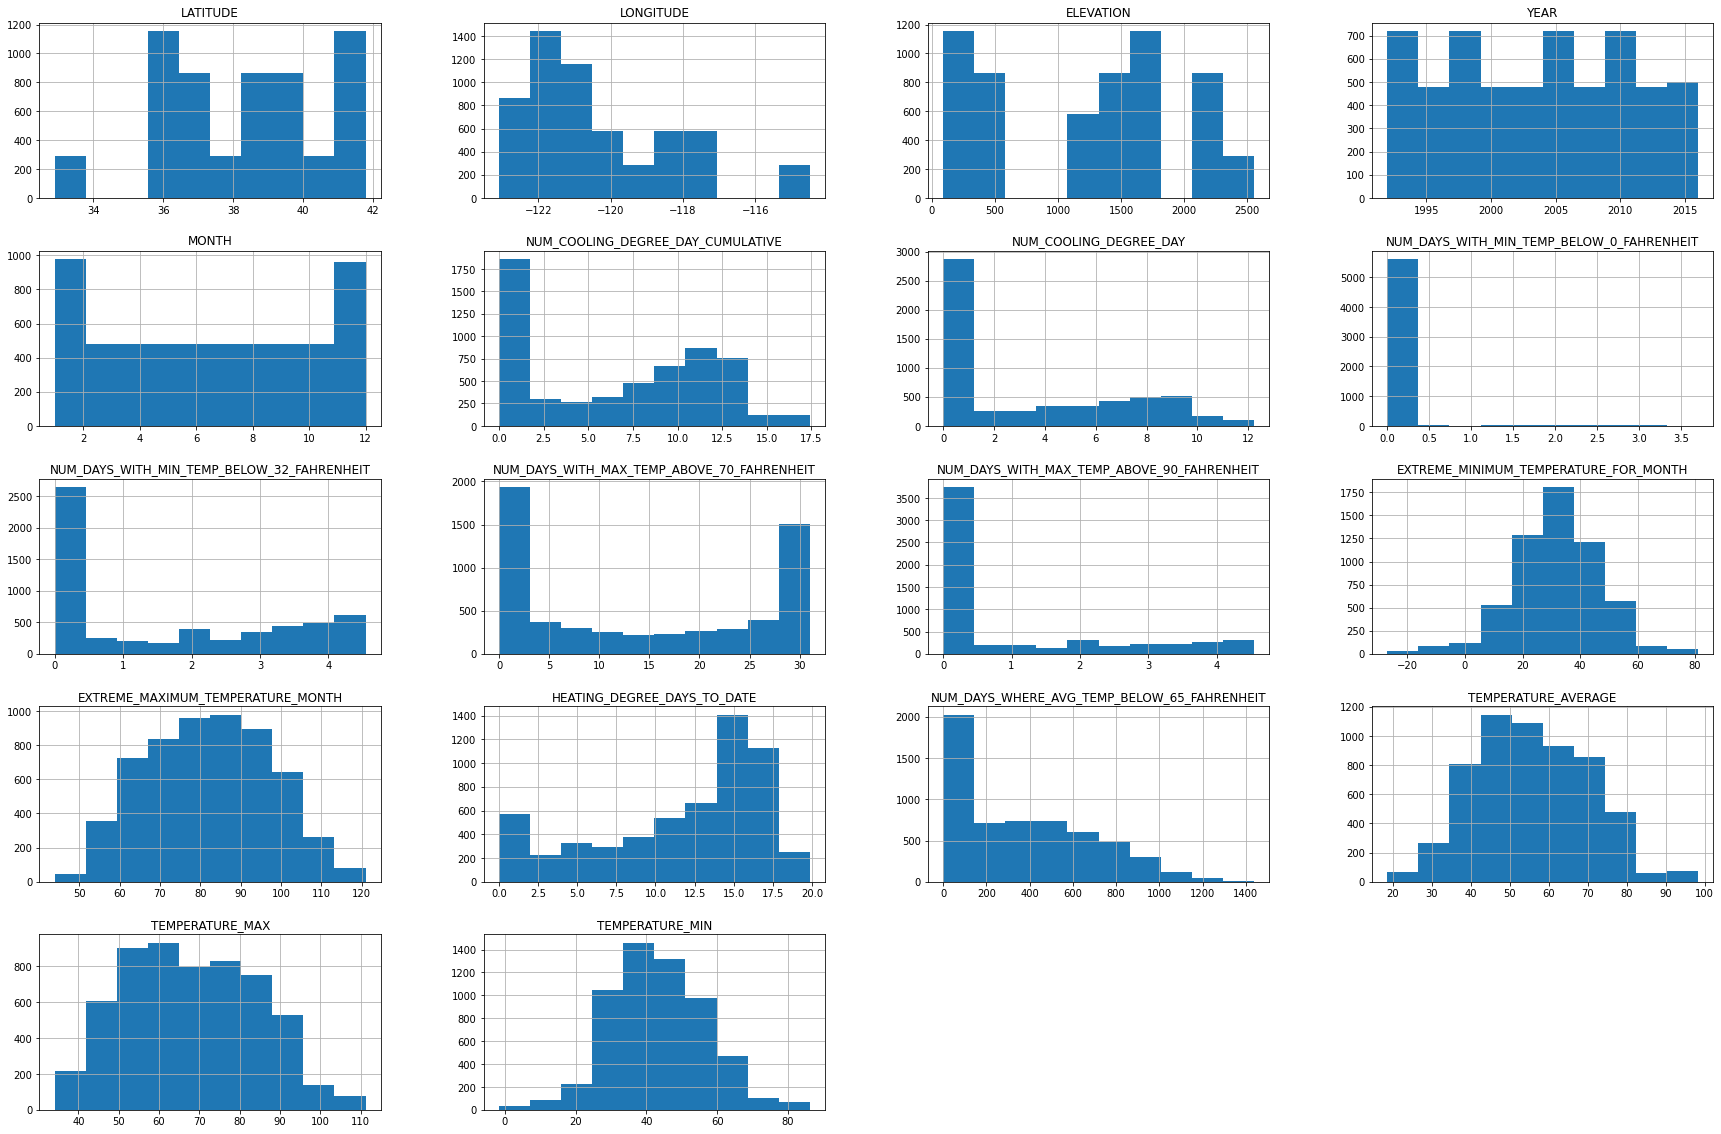

In [ ]:
from scipy.special import boxcox1p

# Next, we will fixed highly skewed features.
skewed_feats = skewed_feats[abs(skewed_feats) > 0.75]
skewed_feats_index = skewed_feats.index
lam = 0.15
for feat in skewed_feats_index:
  noaa_weather[feat] = boxcox1p(noaa_weather[feat], lam)
print("Corrected skew in the numerical features!")

plot_numerical_features(noaa_weather)

# Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
print(noaa_weather.info())
labels_std_normalize = ["ELEVATION", "NUM_COOLING_DEGREE_DAY_CUMULATIVE", "NUM_COOLING_DEGREE_DAY", "NUM_DAYS_WITH_MIN_TEMP_BELOW_0_FAHRENHEIT", "NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT", "NUM_DAYS_WITH_MAX_TEMP_ABOVE_70_FAHRENHEIT", "NUM_DAYS_WITH_MAX_TEMP_ABOVE_90_FAHRENHEIT", "EXTREME_MINIMUM_TEMPERATURE_FOR_MONTH", "EXTREME_MAXIMUM_TEMPERATURE_MONTH", "HEATING_DEGREE_DAYS_TO_DATE", "NUM_DAYS_WHERE_AVG_TEMP_BELOW_65_FAHRENHEIT", "TEMPERATURE_AVERAGE", "TEMPERATURE_MAX", "TEMPERATURE_MIN"]
for label in labels_std_normalize:
  mean = noaa_weather[label].mean()
  std = noaa_weather[label].std()
  noaa_weather[label] = (noaa_weather[label] - mean) / std
display(noaa_weather)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5779 entries, 0 to 8386
Data columns (total 20 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   STATION                                      5779 non-null   object 
 1   LATITUDE                                     5779 non-null   float64
 2   LONGITUDE                                    5779 non-null   float64
 3   ELEVATION                                    5779 non-null   float64
 4   STATION_NAME                                 5779 non-null   object 
 5   YEAR                                         5779 non-null   int64  
 6   MONTH                                        5779 non-null   int64  
 7   NUM_COOLING_DEGREE_DAY_CUMULATIVE            5779 non-null   float64
 8   NUM_COOLING_DEGREE_DAY                       5779 non-null   float64
 9   NUM_DAYS_WITH_MIN_TEMP_BELOW_0_FAHRENHEIT    5779 non-null   float64
 10  

,STATION,LATITUDE,LONGITUDE,ELEVATION,STATION_NAME,YEAR,MONTH,NUM_COOLING_DEGREE_DAY_CUMULATIVE,NUM_COOLING_DEGREE_DAY,NUM_DAYS_WITH_MIN_TEMP_BELOW_0_FAHRENHEIT,NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT,NUM_DAYS_WITH_MAX_TEMP_ABOVE_70_FAHRENHEIT,NUM_DAYS_WITH_MAX_TEMP_ABOVE_90_FAHRENHEIT,EXTREME_MINIMUM_TEMPERATURE_FOR_MONTH,EXTREME_MAXIMUM_TEMPERATURE_MONTH,HEATING_DEGREE_DAYS_TO_DATE,NUM_DAYS_WHERE_AVG_TEMP_BELOW_65_FAHRENHEIT,TEMPERATURE_AVERAGE,TEMPERATURE_MAX,TEMPERATURE_MIN
0,USR0000CCOH,39.8717,-121.7689,-0.913217,COHASSET,1992,1,-1.239760,-0.886171,-0.155696,-0.232580,-1.159138,-0.641117,-0.298527,-0.931493,0.276062,0.620398,-0.616045,-0.888925,-0.238356
1,USR0000CCOH,39.8717,-121.7689,-0.913217,COHASSET,1992,2,-0.850883,-0.338919,-0.155696,-0.935826,-0.674220,-0.641117,0.507624,-0.273876,0.414650,-0.118340,-0.162957,-0.623405,0.405357
2,USR0000CCOH,39.8717,-121.7689,-0.913217,COHASSET,1992,3,-0.850883,-0.886171,-0.155696,-0.935826,-0.835859,-0.641117,0.641983,-0.142352,0.507975,-0.108910,-0.121133,-0.431983,0.270626
3,USR0000CCOH,39.8717,-121.7689,-0.913217,COHASSET,1992,4,-0.316022,0.351139,-0.155696,-0.935826,0.214796,-0.641117,0.709162,0.252218,0.571894,-0.703044,0.401661,0.154633,0.667333
4,USR0000CCOH,39.8717,-121.7689,-0.913217,COHASSET,1992,5,0.477971,1.449139,-0.155696,-0.935826,1.346270,1.326651,1.246597,0.975598,0.595793,-1.133713,1.245103,1.062343,1.393381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,USR0000CHNM,36.5625,-117.4736,1.197506,HUNTER_MOUNTAIN,2011,11,0.739154,-0.886171,-0.155696,1.291149,-0.997499,-0.641117,-1.239037,-0.602685,0.213511,1.349706,-1.194604,-1.216195,-1.091650
8199,USR0000CHNM,36.5625,-117.4736,1.197506,HUNTER_MOUNTAIN,1994,12,0.728818,-0.886171,-0.155696,1.609640,-1.159138,-0.641117,-1.239037,-1.786396,0.517746,1.736365,-1.480398,-1.481716,-1.383566
8386,USR0000CHNM,36.5625,-117.4736,1.197506,HUNTER_MOUNTAIN,2010,12,0.772949,-0.886171,-0.155696,1.740558,-1.159138,-0.641117,-1.709292,-1.720635,0.531317,2.141885,-1.703457,-1.654613,-1.645542
8386,USR0000CHNM,36.5625,-117.4736,1.197506,HUNTER_MOUNTAIN,2011,12,0.772949,-0.886171,-0.155696,1.740558,-1.159138,-0.641117,-1.709292,-1.720635,0.531317,2.141885,-1.703457,-1.654613,-1.645542


# Write the data to a CSV for use in later processing

In [ ]:
get_matching_station = lambda weather_table, station, month, year: (weather_table[((weather_table["STATION_NAME"] == station) & (weather_table["MONTH"] == month) & (weather_table["YEAR"] == year))])
get_matching_station(noaa_weather, "HELL_HOLE", 4, 2004)
# HUNTER_MOUNTAIN, 12, 2012
get_matching_station(noaa_weather, "HUNTER_MOUNTAIN", 12, 2012)

,STATION,LATITUDE,LONGITUDE,ELEVATION,STATION_NAME,YEAR,MONTH,NUM_COOLING_DEGREE_DAY_CUMULATIVE,NUM_COOLING_DEGREE_DAY,NUM_DAYS_WITH_MIN_TEMP_BELOW_0_FAHRENHEIT,NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT,NUM_DAYS_WITH_MAX_TEMP_ABOVE_70_FAHRENHEIT,NUM_DAYS_WITH_MAX_TEMP_ABOVE_90_FAHRENHEIT,EXTREME_MINIMUM_TEMPERATURE_FOR_MONTH,EXTREME_MAXIMUM_TEMPERATURE_MONTH,HEATING_DEGREE_DAYS_TO_DATE,NUM_DAYS_WHERE_AVG_TEMP_BELOW_65_FAHRENHEIT,TEMPERATURE_AVERAGE,TEMPERATURE_MAX,TEMPERATURE_MIN
8386,USR0000CHNM,36.5625,-117.4736,1.197506,HUNTER_MOUNTAIN,2012,12,0.772949,-0.886171,-0.155696,1.740558,-1.159138,-0.641117,-1.709292,-1.720635,0.531317,2.141885,-1.703457,-1.654613,-1.645542


In [ ]:
noaa_weather.to_csv("/content/drive/Shareddrives/Data Science 303 Group Project/csv/noaa_weather/noaa_CA_1992_2016_weather_2781174_CLEANED.csv")